# FIFA DATASET ANALYSIS


In [1]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt


# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

In [5]:
def fifa_dataset(url):
  global df_final  
  df_final=pd.DataFrame()
  for i in range(1,11):
    # url=f'https://sofifa.com/players?offset={i}'
    url= url+ str(i)
    req=requests.get(url)
    soup=BeautifulSoup(req.content)
    image_link=[]
    name=[]
    position=[]
    age=[]
    ova=[]
    pot=[]
    team=[]
    duration=[]
    value=[]
    wage=[]
    total_stats=[]
    hits=[]
    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
      Position = re.sub('^<span.*">|</.*>','',str(i.find('span',{'class':'pos'})))
      Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
      OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
      POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
      Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
      Value = re.sub('<td.*">€|</td>|</td>|K|M','',str(i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">€|</td>|</td>|K','',str(i.find('td',{"class":"col col-wg"})))
      Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
      Hits = re.sub('<td.*">\n|K.*</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

      image_link.append(Image_link)
      name.append(Name)
      position.append(Position)
      age.append(Age)
      ova.append(OVA)
      pot.append(POT)
      team.append(Team)
      duration.append(Duration)
      value.append(Value)
      wage.append(Wage)
      total_stats.append(Total_stats)
      hits.append(Hits)
    df =pd.DataFrame({'Image_link':image_link,'Name':name,'Position':position,'Age':age,'OVA':ova,'POT':pot,'Team':team,'Duration':duration,'Value':value,'Wage':wage,'Total_stats':total_stats,'Hits':hits})
    df.drop(0,inplace=True)
    df['Age']=pd.to_numeric(df['Age'])
    df['OVA']=pd.to_numeric(df['OVA'])
    df['POT']=pd.to_numeric(df['POT'])
    df['Value']=pd.to_numeric(df['Value'])
    df['Wage']=pd.to_numeric(df['Wage'])
    df['Total_stats']=pd.to_numeric(df['Total_stats'])
    df['Hits']=pd.to_numeric(df['Hits'])
    df_final=df_final.append(df,ignore_index=True)

  return df_final    
      
      
      
      
      
      
      
      
      
      
      

    

In [6]:
fifa_599=fifa_dataset('https://sofifa.com/players?offset=')

In [7]:
fifa_600=df_final

In [8]:

df_diff = pd.concat([fifa_600,fifa_599]).drop_duplicates(keep=False)

In [9]:
df_diff

,Image_link,Name,Position,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits


In [10]:
fifa_600.equals(fifa_599)

True

In [11]:
# Considering fifa_600
fifa_600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Position     600 non-null    object 
 3   Age          600 non-null    int64  
 4   OVA          600 non-null    int64  
 5   POT          600 non-null    int64  
 6   Team         600 non-null    object 
 7   Duration     600 non-null    object 
 8   Value        600 non-null    float64
 9   Wage         600 non-null    int64  
 10  Total_stats  600 non-null    int64  
 11  Hits         600 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 56.4+ KB


In [12]:
fifa_600.drop(['Image_link','Duration'],inplace=True,axis=1)

In [13]:
fifa_600

,Name,Position,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Kepa Arrizabalaga,GK,25,79,83,Chelsea,19.0,62,1299,4.9
1,Denzel Dumfries,RB,24,80,83,PSV,26.5,19,2006,4.4
2,Arnaut Danjuma,LM,23,76,80,Bournemouth,11.0,13,1875,3.3
3,Lionel Messi,RW,33,93,93,FC Barcelona,103.5,560,2231,3.0
4,Daniel Alves da Silva,RB,35,82,82,Paris Saint-Germain,4.8,60,2205,2.9
...,...,...,...,...,...,...,...,...,...,...
595,Xherdan Shaqiri,RW,28,79,79,Liverpool,17.5,100,2050,701.0
596,Harvey Elliott,RW,17,72,87,Blackburn Rovers,5.5,11,1658,681.0
597,Mason Greenwood,RM,18,78,89,Manchester United,29.5,35,1937,680.0
598,Phil Foden,CAM,20,83,92,Manchester City,79.5,115,2035,673.0


In [14]:
## EDA


In [15]:
fifa_600.head(20)

,Name,Position,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Kepa Arrizabalaga,GK,25,79,83,Chelsea,19.0,62,1299,4.9
1,Denzel Dumfries,RB,24,80,83,PSV,26.5,19,2006,4.4
2,Arnaut Danjuma,LM,23,76,80,Bournemouth,11.0,13,1875,3.3
3,Lionel Messi,RW,33,93,93,FC Barcelona,103.5,560,2231,3.0
4,Daniel Alves da Silva,RB,35,82,82,Paris Saint-Germain,4.8,60,2205,2.9
5,João Maria Palhinha Gonçalves,CDM,24,82,87,Sporting CP,42.0,16,1996,2.6
6,Yacine Adli,CM,19,72,82,FC Girondins de Bordeaux,5.0,12,1918,2.1
7,Jérémy Doku,RW,18,74,86,Stade Rennais FC,10.0,16,1750,1.9
8,Jaminton Campaz,CAM,20,71,83,Deportes Tolima,4.5,1,1633,1.8
9,Kylian Mbappé,ST,21,90,95,Paris Saint-Germain,185.5,160,2157,1.8


In [16]:
fifa_600.tail(9)

,Name,Position,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
591,Florian Wirtz,CAM,17,76,89,Bayer 04 Leverkusen,17.0,7,1897,715.0
592,Ibrahima Konaté,CB,21,78,87,RB Leipzig,29.5,33,1725,711.0
593,Jules Koundé,CB,21,82,88,Sevilla FC,44.5,25,1909,706.0
594,Kyogo Furuhashi,ST,25,70,71,Vissel Kobe,1.9,6,1892,704.0
595,Xherdan Shaqiri,RW,28,79,79,Liverpool,17.5,100,2050,701.0
596,Harvey Elliott,RW,17,72,87,Blackburn Rovers,5.5,11,1658,681.0
597,Mason Greenwood,RM,18,78,89,Manchester United,29.5,35,1937,680.0
598,Phil Foden,CAM,20,83,92,Manchester City,79.5,115,2035,673.0
599,Alphonso Davies,LB,19,81,89,FC Bayern München,53.0,40,2106,669.0


In [17]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,600.000000,600.00000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,22.436667,76.42500,83.561667,65.90400,77.163333,1867.533333,377.369667
std,4.612821,7.04844,6.571009,158.17671,132.255772,246.541823,373.390335
min,16.000000,55.00000,62.000000,0.00000,0.000000,936.000000,1.000000
25%,19.000000,72.00000,80.000000,6.00000,11.000000,1725.000000,3.300000
50%,21.500000,76.00000,85.000000,17.50000,29.000000,1897.000000,370.500000
75%,25.000000,81.00000,88.000000,44.50000,74.750000,2035.000000,743.000000
max,38.000000,93.00000,95.000000,950.00000,900.000000,2347.000000,981.000000


In [18]:
# 1. Find name of player who is having highest wage
highest_wage=fifa_600[fifa_600['Wage']==max(fifa_600['Wage'])]['Name']
highest_wage

294    Iain Wilson
Name: Name, dtype: object

In [19]:
# Number of duplicated data
fifa_600.duplicated().sum(axis=0)

336

In [20]:
# Drop all duplictate data
fifa_600.drop_duplicates(inplace=True)

In [21]:
#2.1 Find the youngest player
# 2.2 Find the oldest player
youngest_player=fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Name'],fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Age']
oldest_player=fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Name'],fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Age']
print(youngest_player)
print(oldest_player)

(44       Rayan Cherki
150        Emre Demir
223    Dantouma Toure
Name: Name, dtype: object, 44     16
150    16
223    16
Name: Age, dtype: int64)
(24     Aritz Aduriz Zubeldia
168       Zlatan Ibrahimović
Name: Name, dtype: object, 24     38
168    38
Name: Age, dtype: int64)


In [22]:
# List out top 10 players according to their potential
top_10_pot=fifa_600.sort_values(by='POT',ascending=False)['Name'].head(10)
top_10_pot

9                     Kylian Mbappé
22                   Erling Haaland
3                      Lionel Messi
58                     Jadon Sancho
56                       Phil Foden
26     C. Ronaldo dos Santos Aveiro
153                Matthijs de Ligt
158              Robert Lewandowski
23                   Matvey Safonov
109                     Kai Havertz
Name: Name, dtype: object

In [23]:
new_df = pd.DataFrame({"Name":fifa_600['Name'],"POT":fifa_600['POT']})
new_df.head()

,Name,POT
0,Kepa Arrizabalaga,83
1,Denzel Dumfries,83
2,Arnaut Danjuma,80
3,Lionel Messi,93
4,Daniel Alves da Silva,82


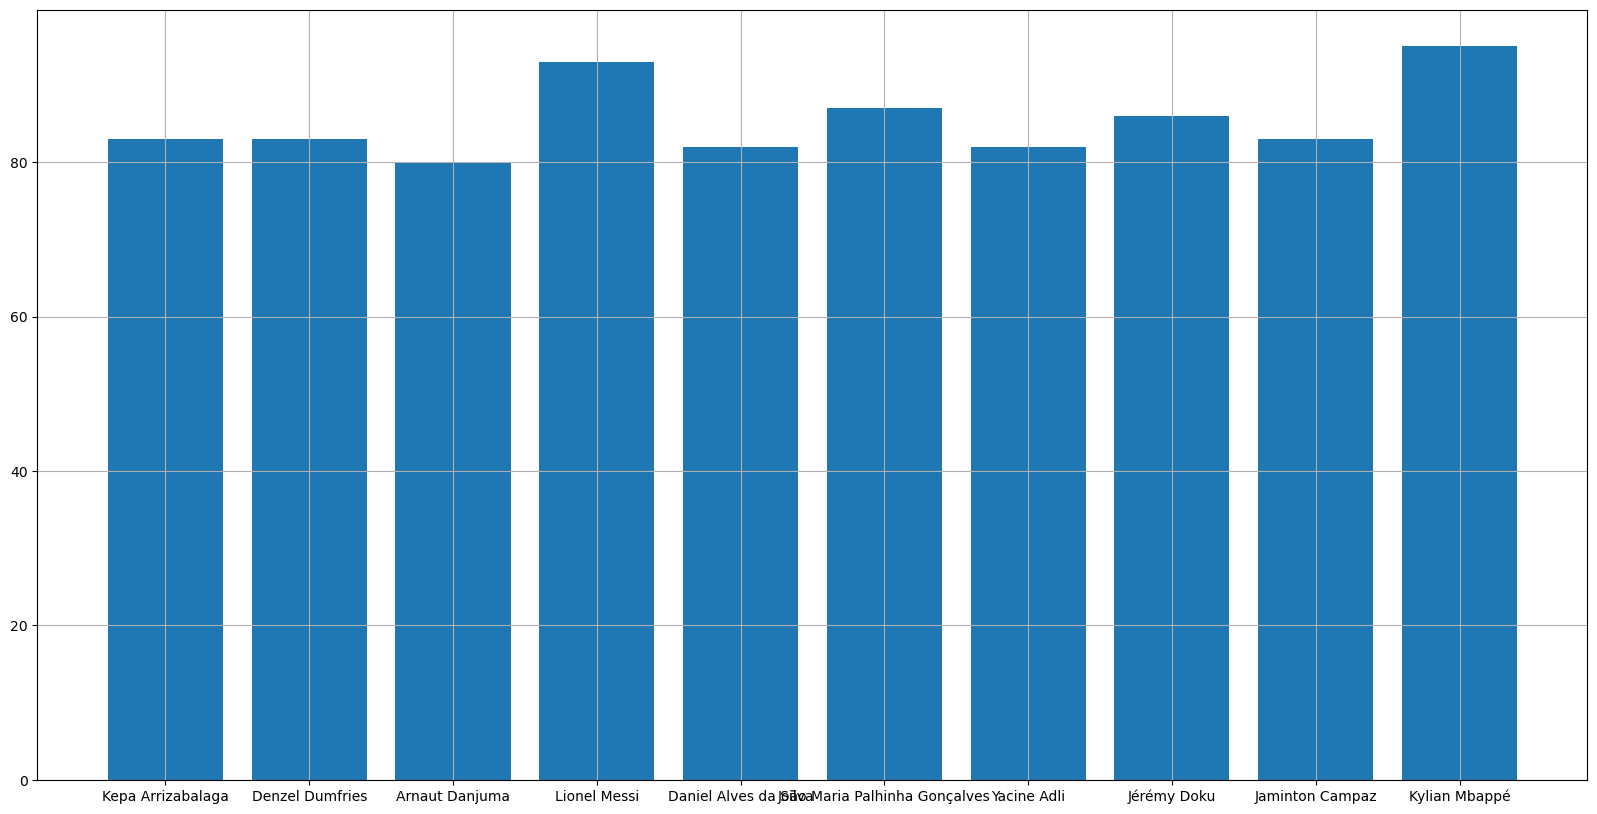

In [24]:
xpoints = new_df['Name'][:10]
ypoints = new_df['POT'][:10]
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()

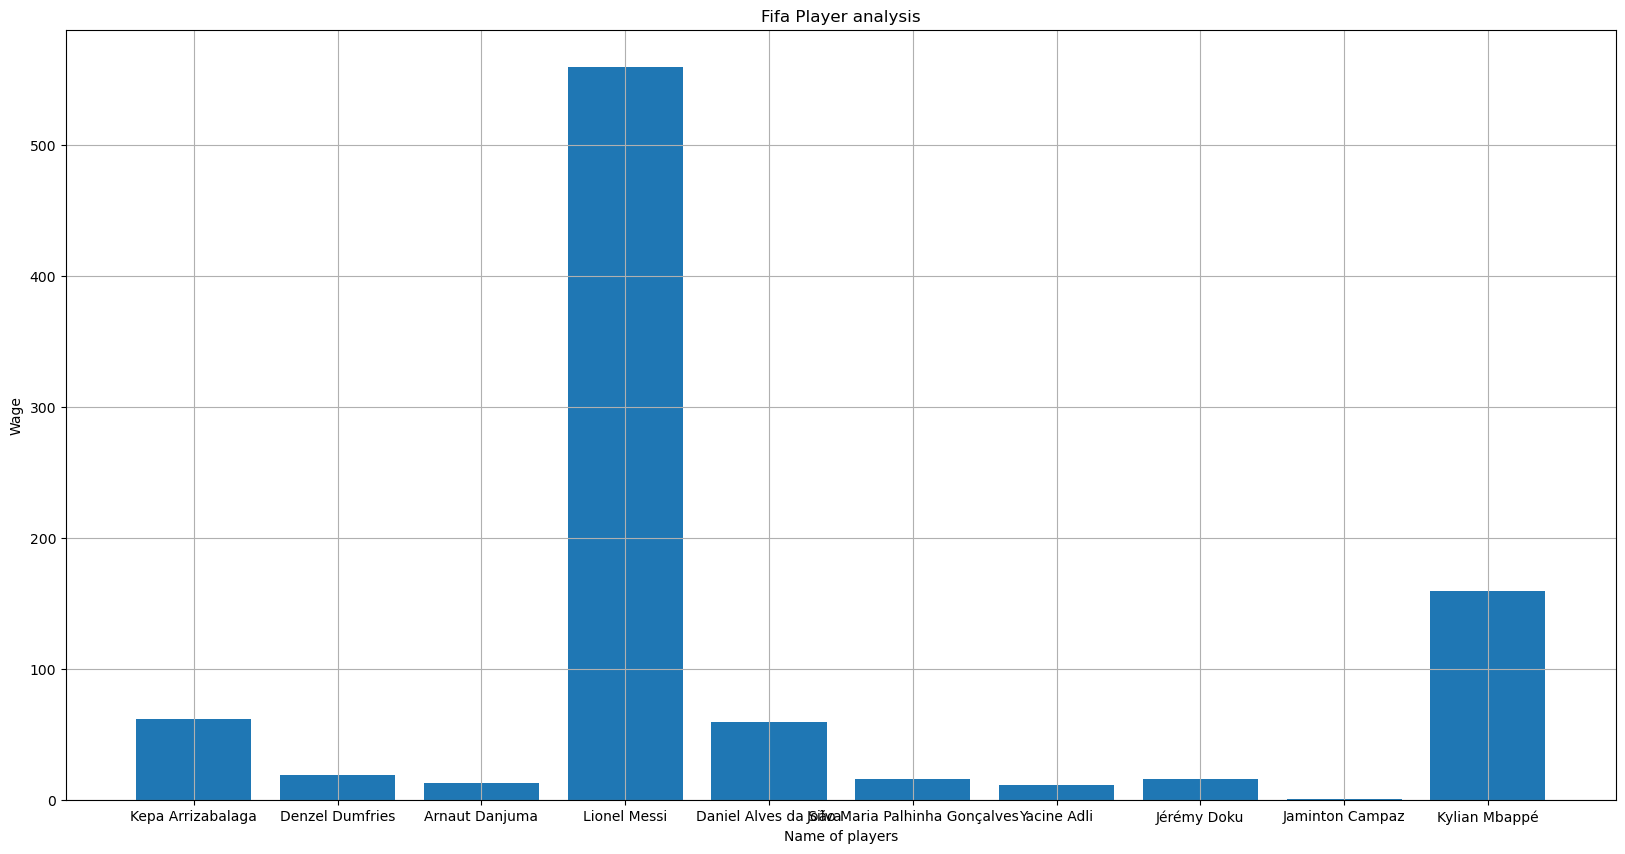

In [25]:
xpoints = fifa_600['Name'][:10]
ypoints = fifa_600['Wage'][:10]
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(xpoints, ypoints)

plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.show()

In [26]:
#6 . Find the player who has scored highest goals

In [27]:
highest_goals=fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']
highest_goals

387    Gerard Moreno Balagueró
Name: Name, dtype: object

In [28]:
# 7. Find all players whose POT is more than equal to 90


In [29]:
fifa_600[fifa_600['POT']>=90]['Name']


3                          Lionel Messi
9                         Kylian Mbappé
12                 Pedro González López
22                       Erling Haaland
23                       Matvey Safonov
26         C. Ronaldo dos Santos Aveiro
35                       Anssumane Fati
48           Neymar da Silva Santos Jr.
56                           Phil Foden
58                         Jadon Sancho
109                         Kai Havertz
126                  Marcos Aoás Corrêa
130    Vinícius José de Oliveira Júnior
153                    Matthijs de Ligt
158                  Robert Lewandowski
176       Bruno Miguel Borges Fernandes
177                      Joshua Kimmich
337                      Anssumane Fati
576                      Anssumane Fati
Name: Name, dtype: object

In [30]:
# Find all player whose pot is more than 90 and age less than 20
# fifa_600[fifa_600['POT']>90) and (fifa_600['Age']<20]['Name']
fifa_600[(fifa_600['POT']>=90) &  (fifa_600['Age']<20) ]['Name']



12                 Pedro González López
22                       Erling Haaland
35                       Anssumane Fati
130    Vinícius José de Oliveira Júnior
337                      Anssumane Fati
576                      Anssumane Fati
Name: Name, dtype: object

In [31]:
# Find all the players whose values>10 wages less than 50
fifa_600[(fifa_600['Value']>10) &  (fifa_600['Wage']<50) ]['Name']

1                    Denzel Dumfries
2                     Arnaut Danjuma
5      João Maria Palhinha Gonçalves
10                   Gonzalo Montiel
12              Pedro González López
                   ...              
298        Luis Benjamin Paes Soares
337                   Anssumane Fati
353                     Jules Koundé
395                 Ryan Gravenberch
576                   Anssumane Fati
Name: Name, Length: 92, dtype: object

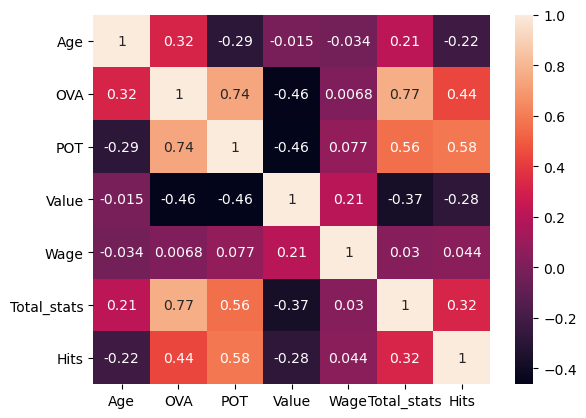

In [37]:
sns.heatmap(fifa_600.corr(),annot=True)
plt.show()
